In [75]:
library(tidyverse)
library(broom) #glance
library(knitr) #kable
library(MASS) #stepAIC
library(data.table) #fread
library(car) #vif

Recommend a model to predict the y variable -- “Opening Weekend Gross” with the possible predictors (no interactions) -- Runtime, Production Budget, Critic Rating, Audience Rating, and/or Month of Release.  

Explain how you determined your model and why you recommended it over other models.



In [76]:
data6 <- fread('https://raw.githubusercontent.com/wilsonify/AppliedRegression/master/data/wide_release_movies.csv')

In [77]:
colnames(data6) <- colnames(data6) %>%
                   tolower() %>% 
                   str_replace_all(' ','_') %>% 
                   str_replace_all('[()]','')

In [82]:
subdata6 <- data6[,c('opening_weekend_gross','runtime','production_budget_in_millions','critic_rating','audience_rating','monthofrelease')]  %>%
            drop_na()

In [93]:
subdata6 <- subdata6 %>% mutate(log_opening_weekend_gross = log10(opening_weekend_gross)) %>% scale() %>% as.data.frame()

Warning message in evalq(log10(opening_weekend_gross), <environment>):
“NaNs produced”

In [94]:
full_fit <- lm(formula = log_opening_weekend_gross~
               runtime+
               production_budget_in_millions+
               critic_rating+
               audience_rating+
               monthofrelease
               ,data = subdata6)

In [95]:
summary(full_fit)


Call:
lm(formula = log_opening_weekend_gross ~ runtime + production_budget_in_millions + 
    critic_rating + audience_rating + monthofrelease, data = subdata6)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3060 -0.3507  0.1095  0.4993  1.7376 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -0.389327   0.074724  -5.210 4.51e-07 ***
runtime                       -0.048707   0.060272  -0.808   0.4199    
production_budget_in_millions  0.425603   0.052303   8.137 3.58e-14 ***
critic_rating                 -0.085496   0.096092  -0.890   0.3746    
audience_rating                0.201056   0.102558   1.960   0.0513 .  
monthofrelease                 0.009511   0.063774   0.149   0.8816    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8578 on 209 degrees of freedom
  (427 observations deleted due to missingness)
Multiple R-squared:  0.2814,	Adjusted R-squared:  0

In [96]:
models <- interaction( c('runtime','production_budget_in_millions','critic_rating','audience_rating','monthofrelease')
                      ,c('runtime','production_budget_in_millions','critic_rating','audience_rating','monthofrelease')
                      ,c('runtime','production_budget_in_millions','critic_rating','audience_rating','monthofrelease')
                      ,c('runtime','production_budget_in_millions','critic_rating','audience_rating','monthofrelease')
                      ,c('runtime','production_budget_in_millions','critic_rating','audience_rating','monthofrelease')
                      ,c('runtime','production_budget_in_millions','critic_rating','audience_rating','monthofrelease')
                      , sep='+') %>% 
           levels() %>% 
           paste("log_opening_weekend_gross ~",.)

In [97]:
subdata6 %>% cor() %>% round(2)

,opening_weekend_gross,runtime,production_budget_in_millions,critic_rating,audience_rating,monthofrelease,log_opening_weekend_gross
opening_weekend_gross,1.00,0.37,0.69,0.15,0.30,-0.02,NA
runtime,0.37,1.00,0.41,0.19,0.34,0.08,NA
production_budget_in_millions,0.69,0.41,1.00,0.07,0.18,0.04,NA
critic_rating,0.15,0.19,0.07,1.00,0.66,0.13,NA
audience_rating,0.30,0.34,0.18,0.66,1.00,0.11,NA
monthofrelease,-0.02,0.08,0.04,0.13,0.11,1.00,NA
log_opening_weekend_gross,NA,NA,NA,NA,NA,NA,1


In [98]:
  
result <- data_frame()
for (form in models) {
    #print(form)
    fit <- lm(data=subdata6, formula = as.formula(form))        
    glance_of_fit <- glance(fit) %>%
                     mutate( model=form
                            ,k = length(fit$coefficients) - 1   
                            ,AICc = AICc_from_AIC(AIC,fit)) %>% 
                     dplyr::select(c( 'model' 
                                     ,'k'
                                     ,'adj.r.squared'
                                     ,'AIC'
                                     ,'AICc'
                                     ,'BIC')
                                  )
    result <- rbind(result,glance_of_fit)
}

In [99]:
rbind(result[which.max(result$adj.r.squared),]
      ,result[which.min(result$AIC),]
      ,result[which.min(result$AICc),]
      ,result[which.min(result$BIC),]
)

model,k,adj.r.squared,AIC,AICc,BIC
log_opening_weekend_gross ~ production_budget_in_millions+audience_rating+audience_rating+audience_rating+audience_rating+audience_rating,2,0.2699400,547.4773,547.5339,560.9599
log_opening_weekend_gross ~ production_budget_in_millions+audience_rating+audience_rating+audience_rating+audience_rating+audience_rating,2,0.2699400,547.4773,547.5339,560.9599
log_opening_weekend_gross ~ production_budget_in_millions+audience_rating+audience_rating+audience_rating+audience_rating+audience_rating,2,0.2699400,547.4773,547.5339,560.9599
log_opening_weekend_gross ~ production_budget_in_millions+production_budget_in_millions+production_budget_in_millions+production_budget_in_millions+production_budget_in_millions+production_budget_in_millions,1,0.2620135,548.8108,548.8296,558.9227


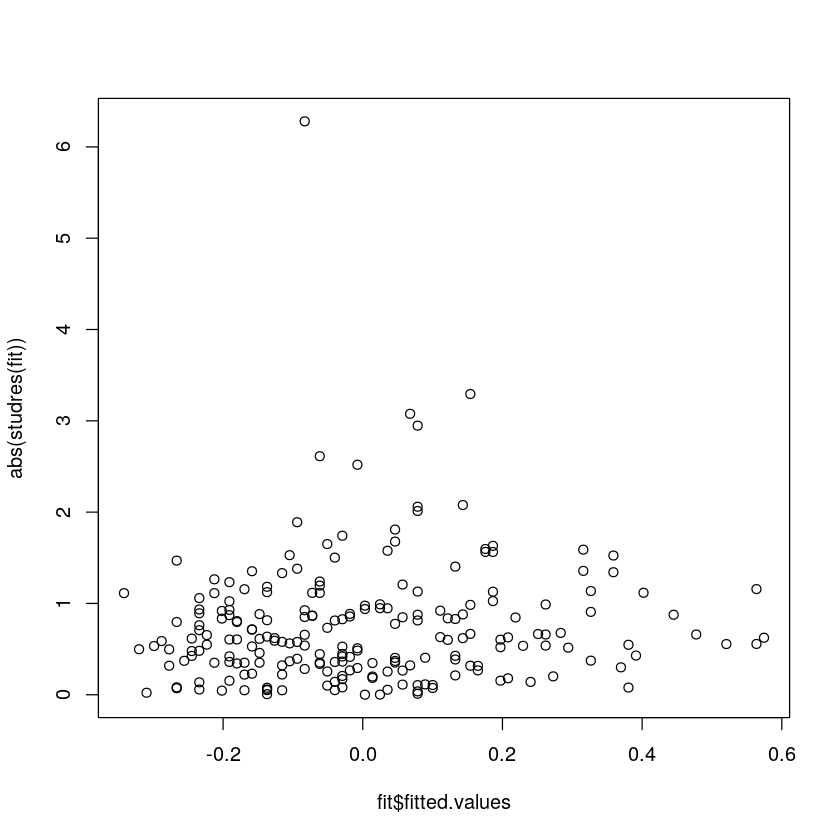

In [103]:
plot(y=abs(studres(fit)),x= fit$fitted.values)

In [29]:
rfit <- lm(abs(studres(fit)) ~ fit$fitted.values)

In [30]:
rfit$fitted.values %>% str()

 Named num [1:642] 1.812 1.607 1.715 0.737 1.27 ...
 - attr(*, "names")= chr [1:642] "1" "2" "3" "4" ...


In [31]:
scaled %>% str()

'data.frame':	642 obs. of  6 variables:
 $ opening_weekend_gross        : num  3.54 3.77 4.23 1.78 4.11 ...
 $ runtime                      : num  -0.204 0.179 1.202 1.138 2.8 ...
 $ production_budget_in_millions: num  2.847 2.847 2.847 0.364 1.436 ...
 $ critic_rating                : num  1.8513 0.0246 0.8619 -0.0515 1.0521 ...
 $ audience_rating              : num  1.902 -0.177 0.924 0.129 1.596 ...
 $ monthofrelease               : num  -0.176 -1.075 -0.476 -0.176 1.322 ...


In [32]:
wfit <- lm(opening_weekend_gross ~ production_budget_in_millions+audience_rating, scaled,weights=(1/(rfit$fitted.values^2)))

In [33]:
summary(wfit)


Call:
lm(formula = opening_weekend_gross ~ production_budget_in_millions + 
    audience_rating, data = scaled, weights = (1/(rfit$fitted.values^2)))

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-7.0265 -0.6582 -0.2600  0.3581 22.0119 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -0.067641   0.037115  -1.823   0.0688 .  
production_budget_in_millions  0.511129   0.050391  10.143   <2e-16 ***
audience_rating                0.006238   0.015682   0.398   0.6909    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.427 on 639 degrees of freedom
Multiple R-squared:  0.1566,	Adjusted R-squared:  0.154 
F-statistic: 59.33 on 2 and 639 DF,  p-value: < 2.2e-16


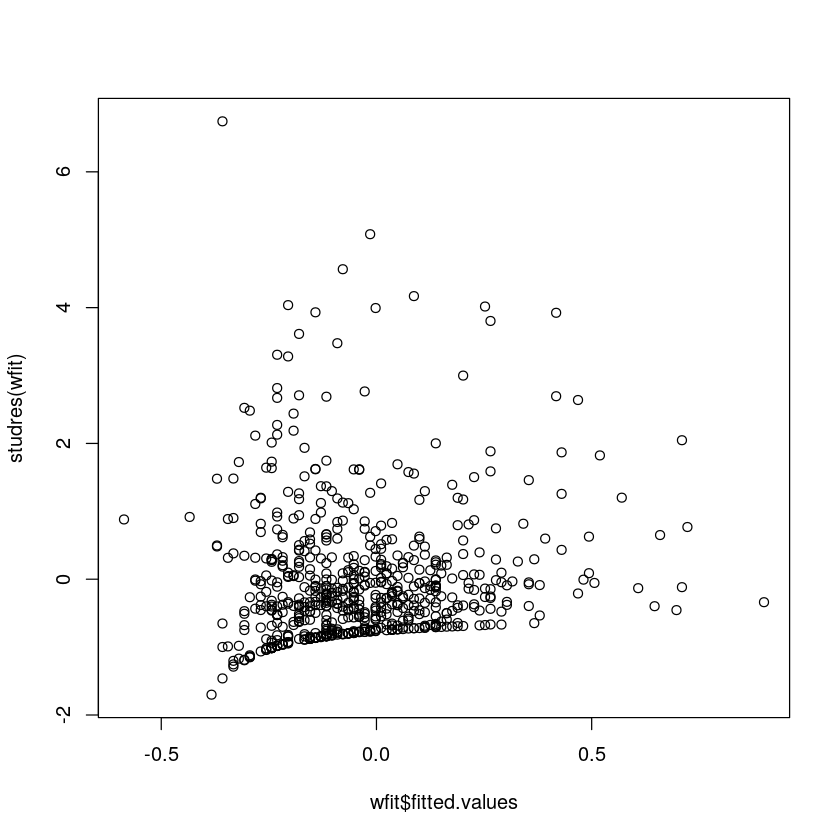

In [101]:
plot(y=studres(wfit),x=wfit$fitted.values)

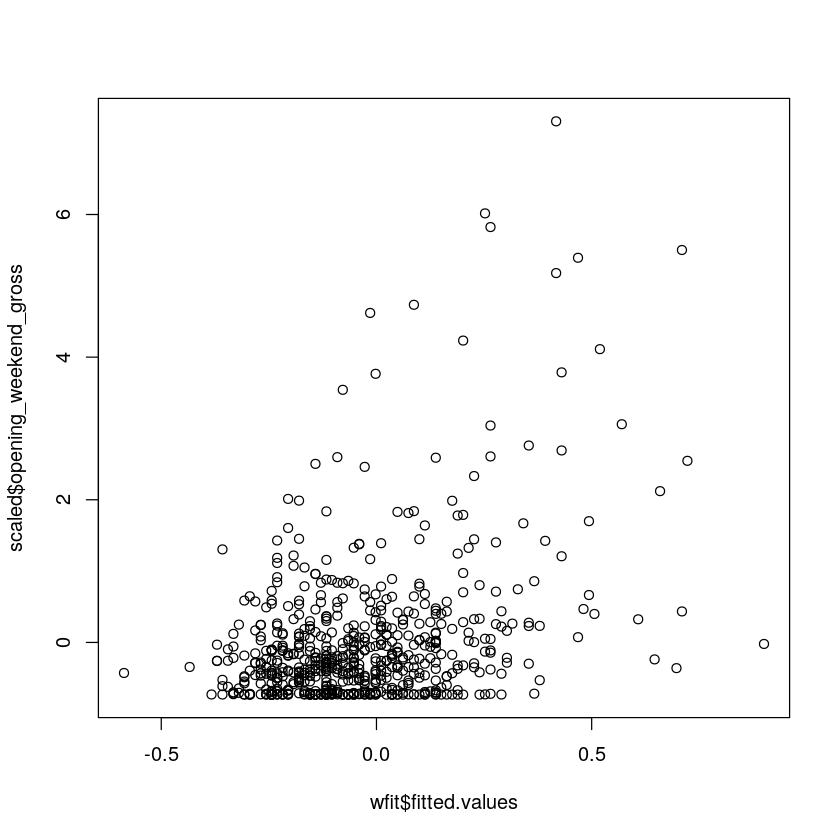

In [39]:
plot(wfit$fitted.values,scaled$opening_weekend_gross)

In [36]:
AICc_from_AIC <- function(AIC,fit) {    
    n <- length(fit$residuals)  
    k <- length(fit$coefficients) - 1    
    correction <- (2*k^2 + 2*k) / (n - k - 1)
    return ( AIC + correction )
    }
    
result <- data_frame()
for (form in models) {
    print(form)
    fit <- lm(data=scaled, formula = as.formula(form)) 
    rfit <- lm(abs(studres(fit)) ~ fit$fitted.values)
    wfit <- lm(data = scaled, as.formula(form), weights=(1/(rfit$fitted.values^2)))
    glance_of_fit <- glance(wfit) %>%
                     mutate( model=form
                            ,k = length(wfit$coefficients) - 1   
                            ,AICc = AICc_from_AIC(AIC,wfit)) %>% 
                     dplyr::select(c( 'model' 
                                     ,'k'
                                     ,'adj.r.squared'
                                     ,'AIC'
                                     ,'AICc'
                                     ,'BIC')
                                  )
    result <- rbind(result,glance_of_fit)
}

[1] "opening_weekend_gross ~ audience_rating+audience_rating+audience_rating+audience_rating+audience_rating+audience_rating"
[1] "opening_weekend_gross ~ critic_rating+audience_rating+audience_rating+audience_rating+audience_rating+audience_rating"
[1] "opening_weekend_gross ~ monthofrelease+audience_rating+audience_rating+audience_rating+audience_rating+audience_rating"
[1] "opening_weekend_gross ~ production_budget_in_millions+audience_rating+audience_rating+audience_rating+audience_rating+audience_rating"
[1] "opening_weekend_gross ~ runtime+audience_rating+audience_rating+audience_rating+audience_rating+audience_rating"
[1] "opening_weekend_gross ~ audience_rating+critic_rating+audience_rating+audience_rating+audience_rating+audience_rating"
[1] "opening_weekend_gross ~ critic_rating+critic_rating+audience_rating+audience_rating+audience_rating+audience_rating"
[1] "opening_weekend_gross ~ monthofrelease+critic_rating+audience_rating+audience_rating+audience_rating+audience_rating

In [37]:
result

model,k,adj.r.squared,AIC,AICc,BIC
opening_weekend_gross ~ audience_rating+audience_rating+audience_rating+audience_rating+audience_rating+audience_rating,1,0.02595851,3127.240,3127.247,3140.634
opening_weekend_gross ~ critic_rating+audience_rating+audience_rating+audience_rating+audience_rating+audience_rating,2,0.31829133,2104.718,2104.737,2122.576
opening_weekend_gross ~ monthofrelease+audience_rating+audience_rating+audience_rating+audience_rating+audience_rating,2,0.25457035,1879.201,1879.220,1897.059
opening_weekend_gross ~ production_budget_in_millions+audience_rating+audience_rating+audience_rating+audience_rating+audience_rating,2,0.15396810,1370.256,1370.275,1388.115
opening_weekend_gross ~ runtime+audience_rating+audience_rating+audience_rating+audience_rating+audience_rating,2,0.02351383,2062.180,2062.199,2080.038
opening_weekend_gross ~ audience_rating+critic_rating+audience_rating+audience_rating+audience_rating+audience_rating,2,0.31829133,2104.718,2104.737,2122.576
opening_weekend_gross ~ critic_rating+critic_rating+audience_rating+audience_rating+audience_rating+audience_rating,2,0.31829133,2104.718,2104.737,2122.576
opening_weekend_gross ~ monthofrelease+critic_rating+audience_rating+audience_rating+audience_rating+audience_rating,3,0.09668899,2045.757,2045.795,2068.080
opening_weekend_gross ~ production_budget_in_millions+critic_rating+audience_rating+audience_rating+audience_rating+audience_rating,3,0.17841523,1350.312,1350.349,1372.635
opening_weekend_gross ~ runtime+critic_rating+audience_rating+audience_rating+audience_rating+audience_rating,3,0.08411795,2081.414,2081.451,2103.737


In [38]:
rbind(result[which.max(result$adj.r.squared),]
      ,result[which.min(result$AIC),]
      ,result[which.min(result$AICc),]
      ,result[which.min(result$BIC),]
)

model,k,adj.r.squared,AIC,AICc,BIC
opening_weekend_gross ~ monthofrelease+critic_rating+runtime+audience_rating+audience_rating+audience_rating,4,0.7196496,1717.483,1717.546,1744.271
opening_weekend_gross ~ production_budget_in_millions+production_budget_in_millions+production_budget_in_millions+production_budget_in_millions+production_budget_in_millions+production_budget_in_millions,1,0.3034367,1009.623,1009.629,1023.016
opening_weekend_gross ~ production_budget_in_millions+production_budget_in_millions+production_budget_in_millions+production_budget_in_millions+production_budget_in_millions+production_budget_in_millions,1,0.3034367,1009.623,1009.629,1023.016
opening_weekend_gross ~ production_budget_in_millions+production_budget_in_millions+production_budget_in_millions+production_budget_in_millions+production_budget_in_millions+production_budget_in_millions,1,0.3034367,1009.623,1009.629,1023.016


In [43]:
full <- lm(opening_weekend_gross ~ monthofrelease+critic_rating+runtime+audience_rating,scaled)
rfull <- lm(abs(studres(full)) ~ full$fitted.values)
wfull <- lm(opening_weekend_gross ~ monthofrelease+critic_rating+runtime+audience_rating,data = scaled, weights=(1/(rfull$fitted.values^2)))    

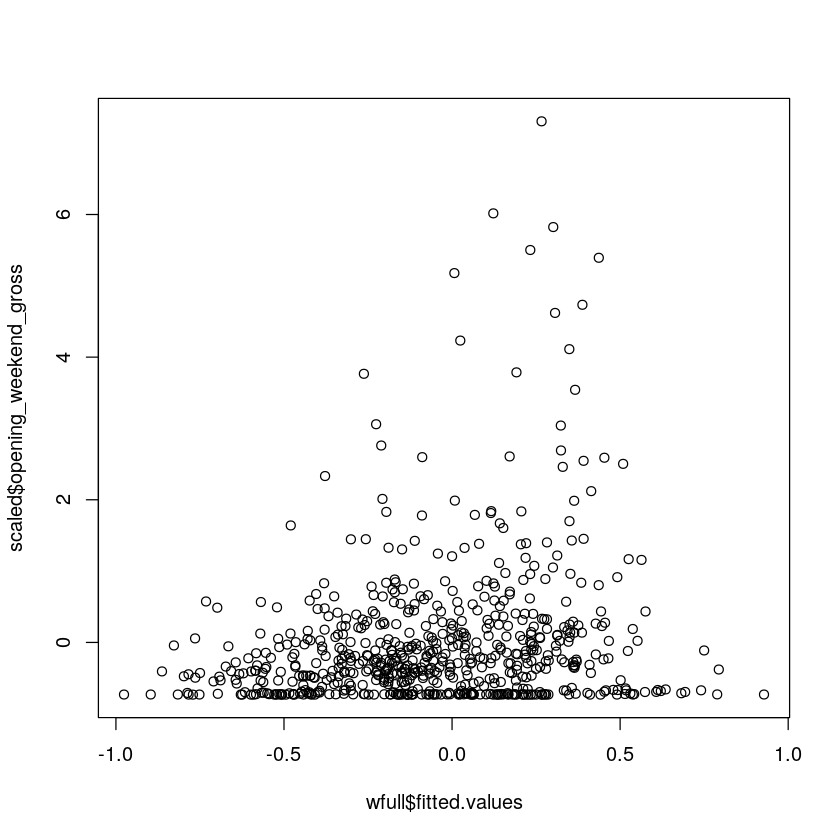

In [44]:
plot(y=scaled$opening_weekend_gross,x=wfull$fitted.values)